# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV


from sklearn import set_config
set_config(print_changed_only=False)

In [2]:
data = pd.read_csv('data.csv')
print(data.shape)
data.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
type(data[['compactness_mean']])

pandas.core.frame.DataFrame

In [6]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
data.drop(columns=["Unnamed: 32","id"],axis=1,inplace=True)

In [8]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
data.diagnosis.replace("B",0,inplace=True)
data.diagnosis.replace("M",1,inplace=True)

In [10]:
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [11]:
# Seperating independent and dependent variables

X = data.drop(columns=["diagnosis"],axis=1)

y = data.diagnosis


X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y.head()


0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [13]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)


In [15]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.077410,0.027990,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.26290,0.24030,0.07370,0.2556,0.09359
389,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.185600,0.102100,0.1989,0.05884,...,20.82,30.44,142.00,1313.0,0.1251,0.24140,0.38290,0.18250,0.2576,0.07602
309,13.05,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,0.1453,0.05518,...,14.73,17.40,93.96,672.4,0.1016,0.05847,0.01824,0.03532,0.2107,0.06580
111,12.63,20.76,82.15,480.4,0.09933,0.12090,0.106500,0.060210,0.1735,0.07070,...,13.33,25.47,89.00,527.4,0.1287,0.22500,0.22160,0.11050,0.2226,0.08486
35,16.74,21.59,110.10,869.5,0.09610,0.13360,0.134800,0.060180,0.1896,0.05656,...,20.01,29.02,133.50,1229.0,0.1563,0.38350,0.54090,0.18130,0.4863,0.08633


In [16]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.077410,0.027990,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.26290,0.24030,0.07370,0.2556,0.09359
389,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.185600,0.102100,0.1989,0.05884,...,20.82,30.44,142.00,1313.0,0.1251,0.24140,0.38290,0.18250,0.2576,0.07602
309,13.05,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,0.1453,0.05518,...,14.73,17.40,93.96,672.4,0.1016,0.05847,0.01824,0.03532,0.2107,0.06580
111,12.63,20.76,82.15,480.4,0.09933,0.12090,0.106500,0.060210,0.1735,0.07070,...,13.33,25.47,89.00,527.4,0.1287,0.22500,0.22160,0.11050,0.2226,0.08486
35,16.74,21.59,110.10,869.5,0.09610,0.13360,0.134800,0.060180,0.1896,0.05656,...,20.01,29.02,133.50,1229.0,0.1563,0.38350,0.54090,0.18130,0.4863,0.08633



The trade-off parameter of logistic regression that determines the strength of the regularization is called C, and higher values of C correspond to less regularization (where we can specify the regularization function).C is actually the Inverse of regularization strength(lambda)


In [17]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.077410,0.027990,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.26290,0.24030,0.07370,0.2556,0.09359
389,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.185600,0.102100,0.1989,0.05884,...,20.82,30.44,142.00,1313.0,0.1251,0.24140,0.38290,0.18250,0.2576,0.07602
309,13.05,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,0.1453,0.05518,...,14.73,17.40,93.96,672.4,0.1016,0.05847,0.01824,0.03532,0.2107,0.06580
111,12.63,20.76,82.15,480.4,0.09933,0.12090,0.106500,0.060210,0.1735,0.07070,...,13.33,25.47,89.00,527.4,0.1287,0.22500,0.22160,0.11050,0.2226,0.08486
35,16.74,21.59,110.10,869.5,0.09610,0.13360,0.134800,0.060180,0.1896,0.05656,...,20.01,29.02,133.50,1229.0,0.1563,0.38350,0.54090,0.18130,0.4863,0.08633


In [18]:
X_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
172,15.460,11.89,102.50,736.9,0.12570,0.15550,0.203200,0.10970,0.1966,0.07069,...,18.790,17.04,125.00,1102.0,0.1531,0.35830,0.58300,0.18270,0.3216,0.10100
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.01282,0.1692,0.06576,...,9.845,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393
374,13.690,16.07,87.84,579.1,0.08302,0.06374,0.025560,0.02031,0.1872,0.05669,...,14.840,20.21,99.16,670.6,0.1105,0.20960,0.13460,0.06987,0.3323,0.07701
370,16.350,23.29,109.00,840.4,0.09742,0.14970,0.181100,0.08773,0.2175,0.06218,...,19.380,31.03,129.30,1165.0,0.1415,0.46650,0.70870,0.22480,0.4824,0.09614
419,11.160,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,...,12.360,28.92,79.26,458.0,0.1282,0.11080,0.03582,0.04306,0.2976,0.07123


In [19]:
X_train.shape

(398, 30)

In [20]:
X_test.shape

(171, 30)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.001, penalty='l2')
model.fit(X_train,y_train)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_predict= model.predict(X_test)
y_predict

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [23]:
np.array(y_test)

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))



0.9473684210526315


In [25]:
pd.crosstab(y_test,y_predict) #Confusion Matrix

col_0,0,1
diagnosis,,
0,107,5
1,4,55


In [26]:
pd.crosstab(y_predict,y_test)

diagnosis,0,1
row_0,,
0,107,4
1,5,55


In [27]:
model.predict_proba(X_test)[:,1]

array([9.89229680e-01, 5.79170228e-04, 1.77719719e-02, 9.97215444e-01,
       7.46085019e-03, 4.54219579e-03, 2.36413648e-03, 7.59631426e-01,
       9.99971548e-01, 8.06912548e-01, 3.50913868e-03, 3.68305304e-03,
       5.13522172e-01, 1.57723309e-02, 9.93840727e-01, 9.87243926e-01,
       5.19979528e-03, 1.45911791e-01, 1.80861730e-02, 9.32427381e-01,
       7.60919991e-01, 3.06432123e-01, 3.96558843e-03, 1.13273060e-01,
       9.99998366e-01, 9.99987943e-01, 1.69110298e-01, 9.99974731e-01,
       3.91187485e-03, 7.52899905e-02, 1.59436883e-02, 4.18449475e-03,
       9.99999813e-01, 4.30763174e-03, 1.09966760e-01, 2.82097334e-02,
       8.60158372e-02, 1.16857812e-04, 1.02536303e-02, 2.18182911e-02,
       2.74989796e-03, 7.34193245e-04, 5.12028438e-04, 5.76672601e-02,
       4.94240694e-03, 1.00000000e+00, 9.80651429e-01, 9.48156722e-01,
       9.77473668e-01, 1.07486753e-03, 6.29380155e-02, 2.06577294e-02,
       9.98706911e-01, 7.29012799e-03, 4.31876536e-02, 1.00000000e+00,
      

In [28]:
y_predict_th3 = np.where(model.predict_proba(X_test)[:,1]>0.3,1,0) # Threshold is 0.3
y_predict_th4 = np.where(model.predict_proba(X_test)[:,1]>0.4,1,0) # Threshold is 0.4
y_predict_th1 = np.where(model.predict_proba(X_test)[:,1]>0.1,1,0)

In [29]:
pd.crosstab(y_test,y_predict_th1)

col_0,0,1
diagnosis,,
0,99,13
1,2,57


In [30]:
pd.crosstab(y_test,y_predict_th3)

col_0,0,1
diagnosis,,
0,106,6
1,3,56


In [31]:
pd.crosstab(y_test,y_predict_th4)

col_0,0,1
diagnosis,,
0,106,6
1,4,55


In [32]:
def predict_threshold (model,X_test,thresholds):
    import numpy as np
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0) 


In [33]:
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.05):
    y_predict = predict_threshold(model,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[  0 112]
 [  0  59]]
Threshold : 0.05
[[86 26]
 [ 0 59]]
Threshold : 0.1
[[99 13]
 [ 2 57]]
Threshold : 0.15000000000000002
[[102  10]
 [  2  57]]
Threshold : 0.2
[[104   8]
 [  3  56]]
Threshold : 0.25
[[105   7]
 [  3  56]]
Threshold : 0.30000000000000004
[[106   6]
 [  3  56]]
Threshold : 0.35000000000000003
[[106   6]
 [  4  55]]
Threshold : 0.4
[[106   6]
 [  4  55]]
Threshold : 0.45
[[106   6]
 [  4  55]]
Threshold : 0.5
[[107   5]
 [  4  55]]
Threshold : 0.55
[[108   4]
 [  6  53]]
Threshold : 0.6000000000000001
[[108   4]
 [  6  53]]
Threshold : 0.65
[[109   3]
 [  6  53]]
Threshold : 0.7000000000000001
[[109   3]
 [  6  53]]
Threshold : 0.75
[[109   3]
 [  6  53]]
Threshold : 0.8
[[111   1]
 [  7  52]]
Threshold : 0.8500000000000001
[[111   1]
 [  8  51]]
Threshold : 0.9
[[111   1]
 [  9  50]]
Threshold : 0.9500000000000001
[[112   0]
 [ 12  47]]


In [34]:
from sklearn.metrics import roc_auc_score,roc_curve

In [35]:
tpr,fpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

In [36]:
tpr

array([0.        , 0.        , 0.        , 0.00892857, 0.00892857,
       0.01785714, 0.01785714, 0.03571429, 0.03571429, 0.04464286,
       0.04464286, 0.05357143, 0.05357143, 0.07142857, 0.07142857,
       0.15178571, 0.15178571, 0.19642857, 0.19642857, 1.        ])

In [37]:
fpr

array([0.        , 0.03389831, 0.83050847, 0.83050847, 0.88135593,
       0.88135593, 0.89830508, 0.89830508, 0.91525424, 0.91525424,
       0.93220339, 0.93220339, 0.94915254, 0.94915254, 0.96610169,
       0.96610169, 0.98305085, 0.98305085, 1.        , 1.        ])

In [38]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.48156722e-01, 9.32427381e-01,
       8.06912548e-01, 7.98252153e-01, 7.60919991e-01, 6.13794317e-01,
       5.47775931e-01, 5.37400496e-01, 5.13522172e-01, 4.93282310e-01,
       3.06432123e-01, 2.48943201e-01, 1.88352195e-01, 8.05874636e-02,
       7.97576220e-02, 5.85322857e-02, 5.76672601e-02, 1.16857812e-04])

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

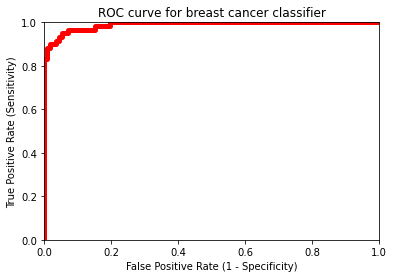

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

#FPR = 1 - Specificity => Specificity = 1 - FPR

In [40]:
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.989860774818402

In [41]:
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(model,{'C':[0.01,0.001,10,100],'penalty':["l1","l2","elasticnet"]})
grid.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=0.001, class_weight=None,
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.001, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
grid.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [43]:
grid.best_score_

0.9421518987341774

In [44]:
type({'C':[0.01,0.001,10,100],'penalty':["l1","l2","elasticnet"]})

dict

In [45]:
#model.summary()

1. penalty is a string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.

2. dual is a Boolean (False by default) that decides whether to use primal (when False) or dual formulation (when True).

3. tol is a floating-point number (0.0001 by default) that defines the tolerance for stopping the procedure.

4. C is a positive floating-point number (1.0 by default) that defines the relative strength of regularization. Smaller values indicate stronger regularization.

5. fit_intercept is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (when True) or consider it equal to zero (when False).

6. intercept_scaling is a floating-point number (1.0 by default) that defines the scaling of the intercept 𝑏₀.

7. class_weight is a dictionary, 'balanced', or None (default) that defines the weights related to each class. When None, all classes have the weight one.

8. random_state is an integer, an instance of numpy.RandomState, or None (default) that defines what pseudo-random number generator to use.

9. solver is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.

10. max_iter is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.

11. multi_class is a string ('ovr' by default) that decides the approach to use for handling multiple classes. Other options are 'multinomial' and 'auto'.

12. verbose is a non-negative integer (0 by default) that defines the verbosity for the 'liblinear' and 'lbfgs' solvers.

13. warm_start is a Boolean (False by default) that decides whether to reuse the previously obtained solution.

14. n_jobs is an integer or None (default) that defines the number of parallel processes to use. None usually means to use one core, while -1 means to use all available cores.

15. l1_ratio is either a floating-point number between zero and one or None (default). It defines the relative importance of the L1 part in the elastic-net regularization.

# Manual calculation of the proba value

In [46]:
model.coef_

array([[-1.31424616e-02,  4.82500445e-02,  1.83912064e-02,
        -1.93697837e-02,  6.77588714e-04,  2.91971144e-03,
         4.57615133e-03,  1.82231558e-03,  7.39356085e-04,
         1.79814618e-04,  6.67813457e-04, -2.10924299e-03,
         3.49802904e-03,  3.70694565e-02,  8.56164386e-05,
         5.40087073e-04,  9.26972571e-04,  2.65807103e-04,
         5.18806630e-05,  4.84366071e-05, -1.18730074e-02,
         7.82227881e-02,  4.66657615e-02,  2.19836611e-02,
         1.30638290e-03,  9.39889952e-03,  1.25714118e-02,
         3.65255293e-03,  2.23283352e-03,  9.83916378e-04]])

In [47]:
model.intercept_

array([-16.30867173])

In [48]:
X_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
172,15.460,11.89,102.50,736.9,0.12570,0.15550,0.203200,0.10970,0.1966,0.07069,...,18.790,17.04,125.00,1102.0,0.1531,0.35830,0.58300,0.18270,0.3216,0.10100
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.01282,0.1692,0.06576,...,9.845,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393
374,13.690,16.07,87.84,579.1,0.08302,0.06374,0.025560,0.02031,0.1872,0.05669,...,14.840,20.21,99.16,670.6,0.1105,0.20960,0.13460,0.06987,0.3323,0.07701
370,16.350,23.29,109.00,840.4,0.09742,0.14970,0.181100,0.08773,0.2175,0.06218,...,19.380,31.03,129.30,1165.0,0.1415,0.46650,0.70870,0.22480,0.4824,0.09614
419,11.160,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,...,12.360,28.92,79.26,458.0,0.1282,0.11080,0.03582,0.04306,0.2976,0.07123


In [49]:
#   y_predicted = m1 * x1 + m2 * x2+......m30 * x30 + c

In [50]:
model.intercept_

array([-16.30867173])

In [51]:
model.coef_

array([[-1.31424616e-02,  4.82500445e-02,  1.83912064e-02,
        -1.93697837e-02,  6.77588714e-04,  2.91971144e-03,
         4.57615133e-03,  1.82231558e-03,  7.39356085e-04,
         1.79814618e-04,  6.67813457e-04, -2.10924299e-03,
         3.49802904e-03,  3.70694565e-02,  8.56164386e-05,
         5.40087073e-04,  9.26972571e-04,  2.65807103e-04,
         5.18806630e-05,  4.84366071e-05, -1.18730074e-02,
         7.82227881e-02,  4.66657615e-02,  2.19836611e-02,
         1.30638290e-03,  9.39889952e-03,  1.25714118e-02,
         3.65255293e-03,  2.23283352e-03,  9.83916378e-04]])

In [52]:
#Calculating the sigmoid value manually

# 1/(1+e^(-y_predicted))

1/(1+np.exp(-(1.12696885*15.460)-(0.25747445 *11.89)+21.59927761))

0.24694586436396845

In [53]:
-(1.12696885*15.460)-(0.25747445 *11.89)+21.59927761


1.114967978500001

In [54]:
1/(1+np.exp(-1000))

1.0